In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/Heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset comprises of 13 columns described as:
1. Age
2. Sex 1-male 0-female
3. The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Changing the column names for better understanding and then we will also change values of categorical variables in a few columns for better data interpretation

In [4]:
df = df.rename(columns= {'cp':'chest_pain_type','trestbps':'resting_BP','chol':'serum_cholestoral','fbs':'fasting_blood_sugar','restecg':'rest_ecg',
                                     'thalach':'max_heart_rate','exang':'exercise_induced_angina', 
                                     'ca':'major_vessels_count','thal':'thalassemia'})
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_BP', 'serum_cholestoral',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'major_vessels_count',
       'thalassemia', 'target'],
      dtype='object')

In [5]:
# Checking for null values in dataset
df.isnull().sum()


age                        0
sex                        0
chest_pain_type            0
resting_BP                 0
serum_cholestoral          0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
slope                      0
major_vessels_count        0
thalassemia                0
target                     0
dtype: int64

There are no null values in the data, we dont have to conduct any data processing for null values, however, we will check for distribution of column values

Now checking presence of heart disease based of individual features to identify if any partifular feature relates to heart disease 

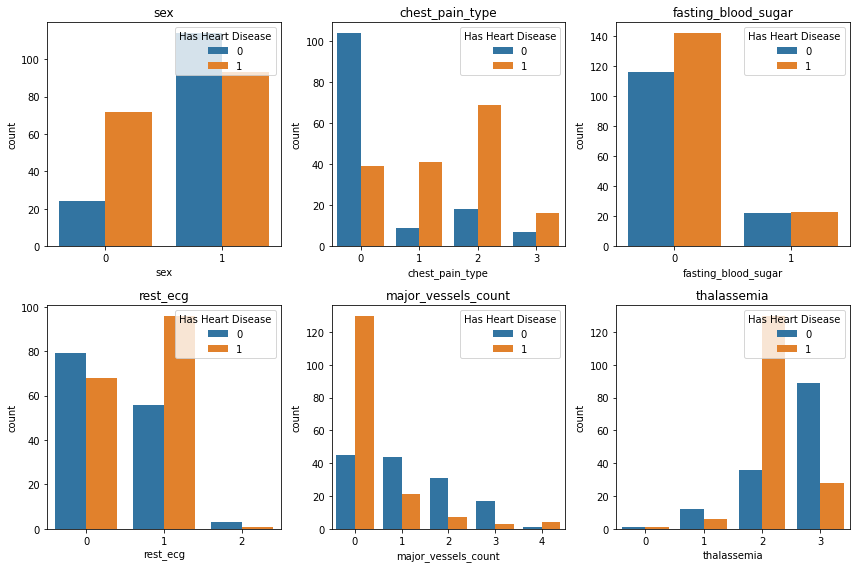

In [6]:
cols = [ 'sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'major_vessels_count', 'thalassemia']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*4, n_rows*4))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  # setting index to go through each columns
        ax = axs[r][c]   # Just to show where to position each of the 4 subplots
        
        #Creating subplots - using i to loop though each of the 4 columns we created
        sns.countplot(df[cols[i]], hue = df['target'], ax = ax)
        
        # Setting title for each chart
        ax.set_title(cols[i])
        
        #Setting legend for each chart
        ax.legend(title = 'Has Heart Disease', loc = 'upper right')
plt.tight_layout()

s seen in the Charts:
1. Heart disease rate among females is high
2. Possibilty of heart disease increases witt chest pain types and is highest for chest pain type 2 and 3
3. Among those with fasting blood sugar greater than 120, there is no significant relation with heart disease
4. Possibility of heart disease is highest for resting ecg type 1
5. cavalues 0 has highest rate of heart disease
6. Thak values 2 corresponds to fixed defects and has highest heart disease rate

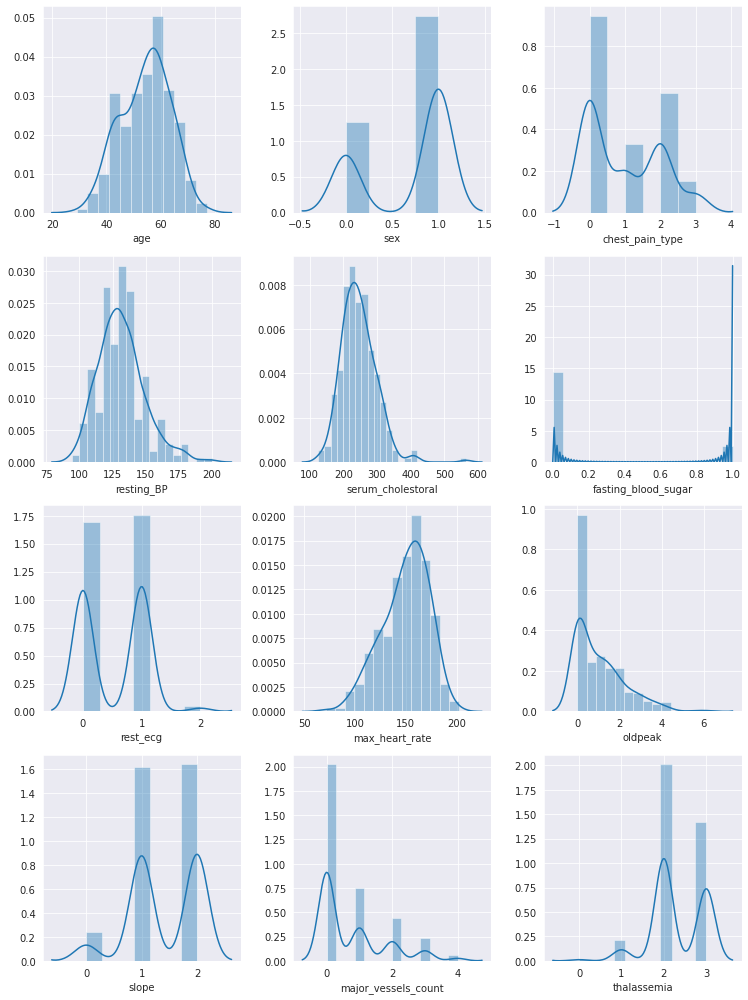

In [7]:
sns.set_style('darkgrid')
cols = ['age', 'sex', 'chest_pain_type', 'resting_BP', 'serum_cholestoral',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate'
       , 'oldpeak', 'slope', 'major_vessels_count',
       'thalassemia']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.distplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

The following can be concluded from the distplots above:

1. Age & Resting BP follows normal distribution
2. Serum Cholestoreol shows signs of slight negative skewness
3. Max Heart Rate shows signs of slight positive skewness
4. Oldpeak shows signs of kurtosis

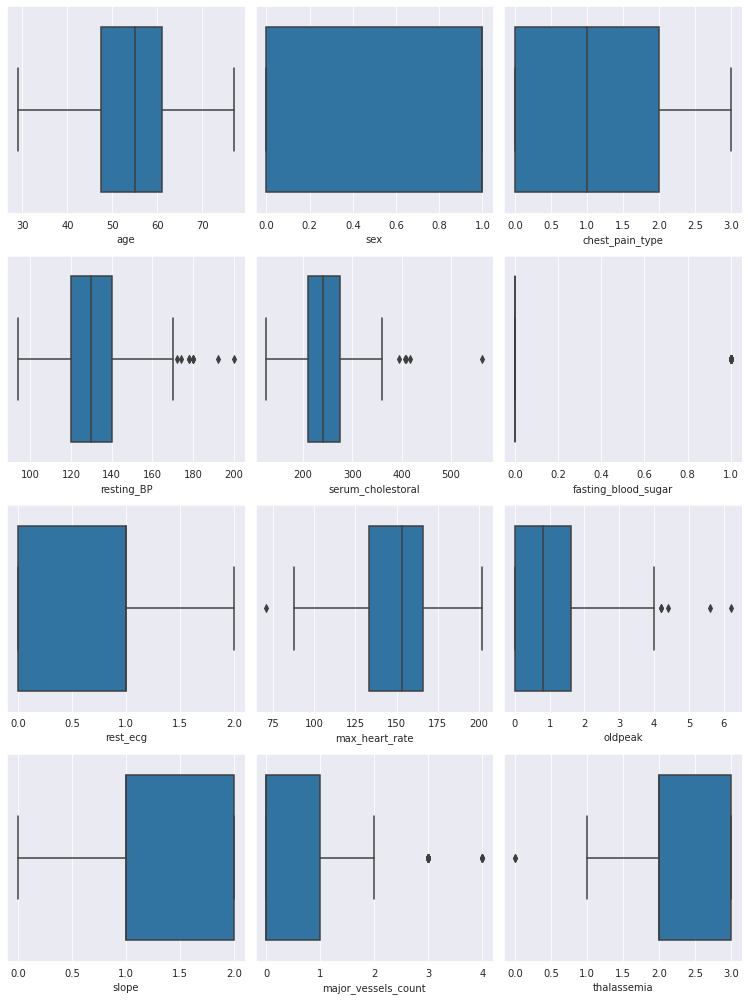

In [8]:
sns.set_style('darkgrid')
cols = ['age', 'sex', 'chest_pain_type', 'resting_BP', 'serum_cholestoral',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate'
       , 'oldpeak', 'slope', 'major_vessels_count',
       'thalassemia']
n_rows = 4
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c] 
        
        sns.boxplot(df[cols[i]], ax = ax)
        
    plt.tight_layout()

The boxplots concludes the following:
1. 90% an above patients have chest pain types 0,1,2
2. Mean resting blood pressure is 130, however we see outliers rangin above 180 -200
3. Mean Serum cholesterol is 250, however we have outliers above 400
4. We also have patients with higher major_vessel_counts and oldpeak, and some with lower heart rates

We will not be treating the outliers in the data since there is practical possibilities for these values to exist

Lets also check the target variable across features to see if there is any high correlation

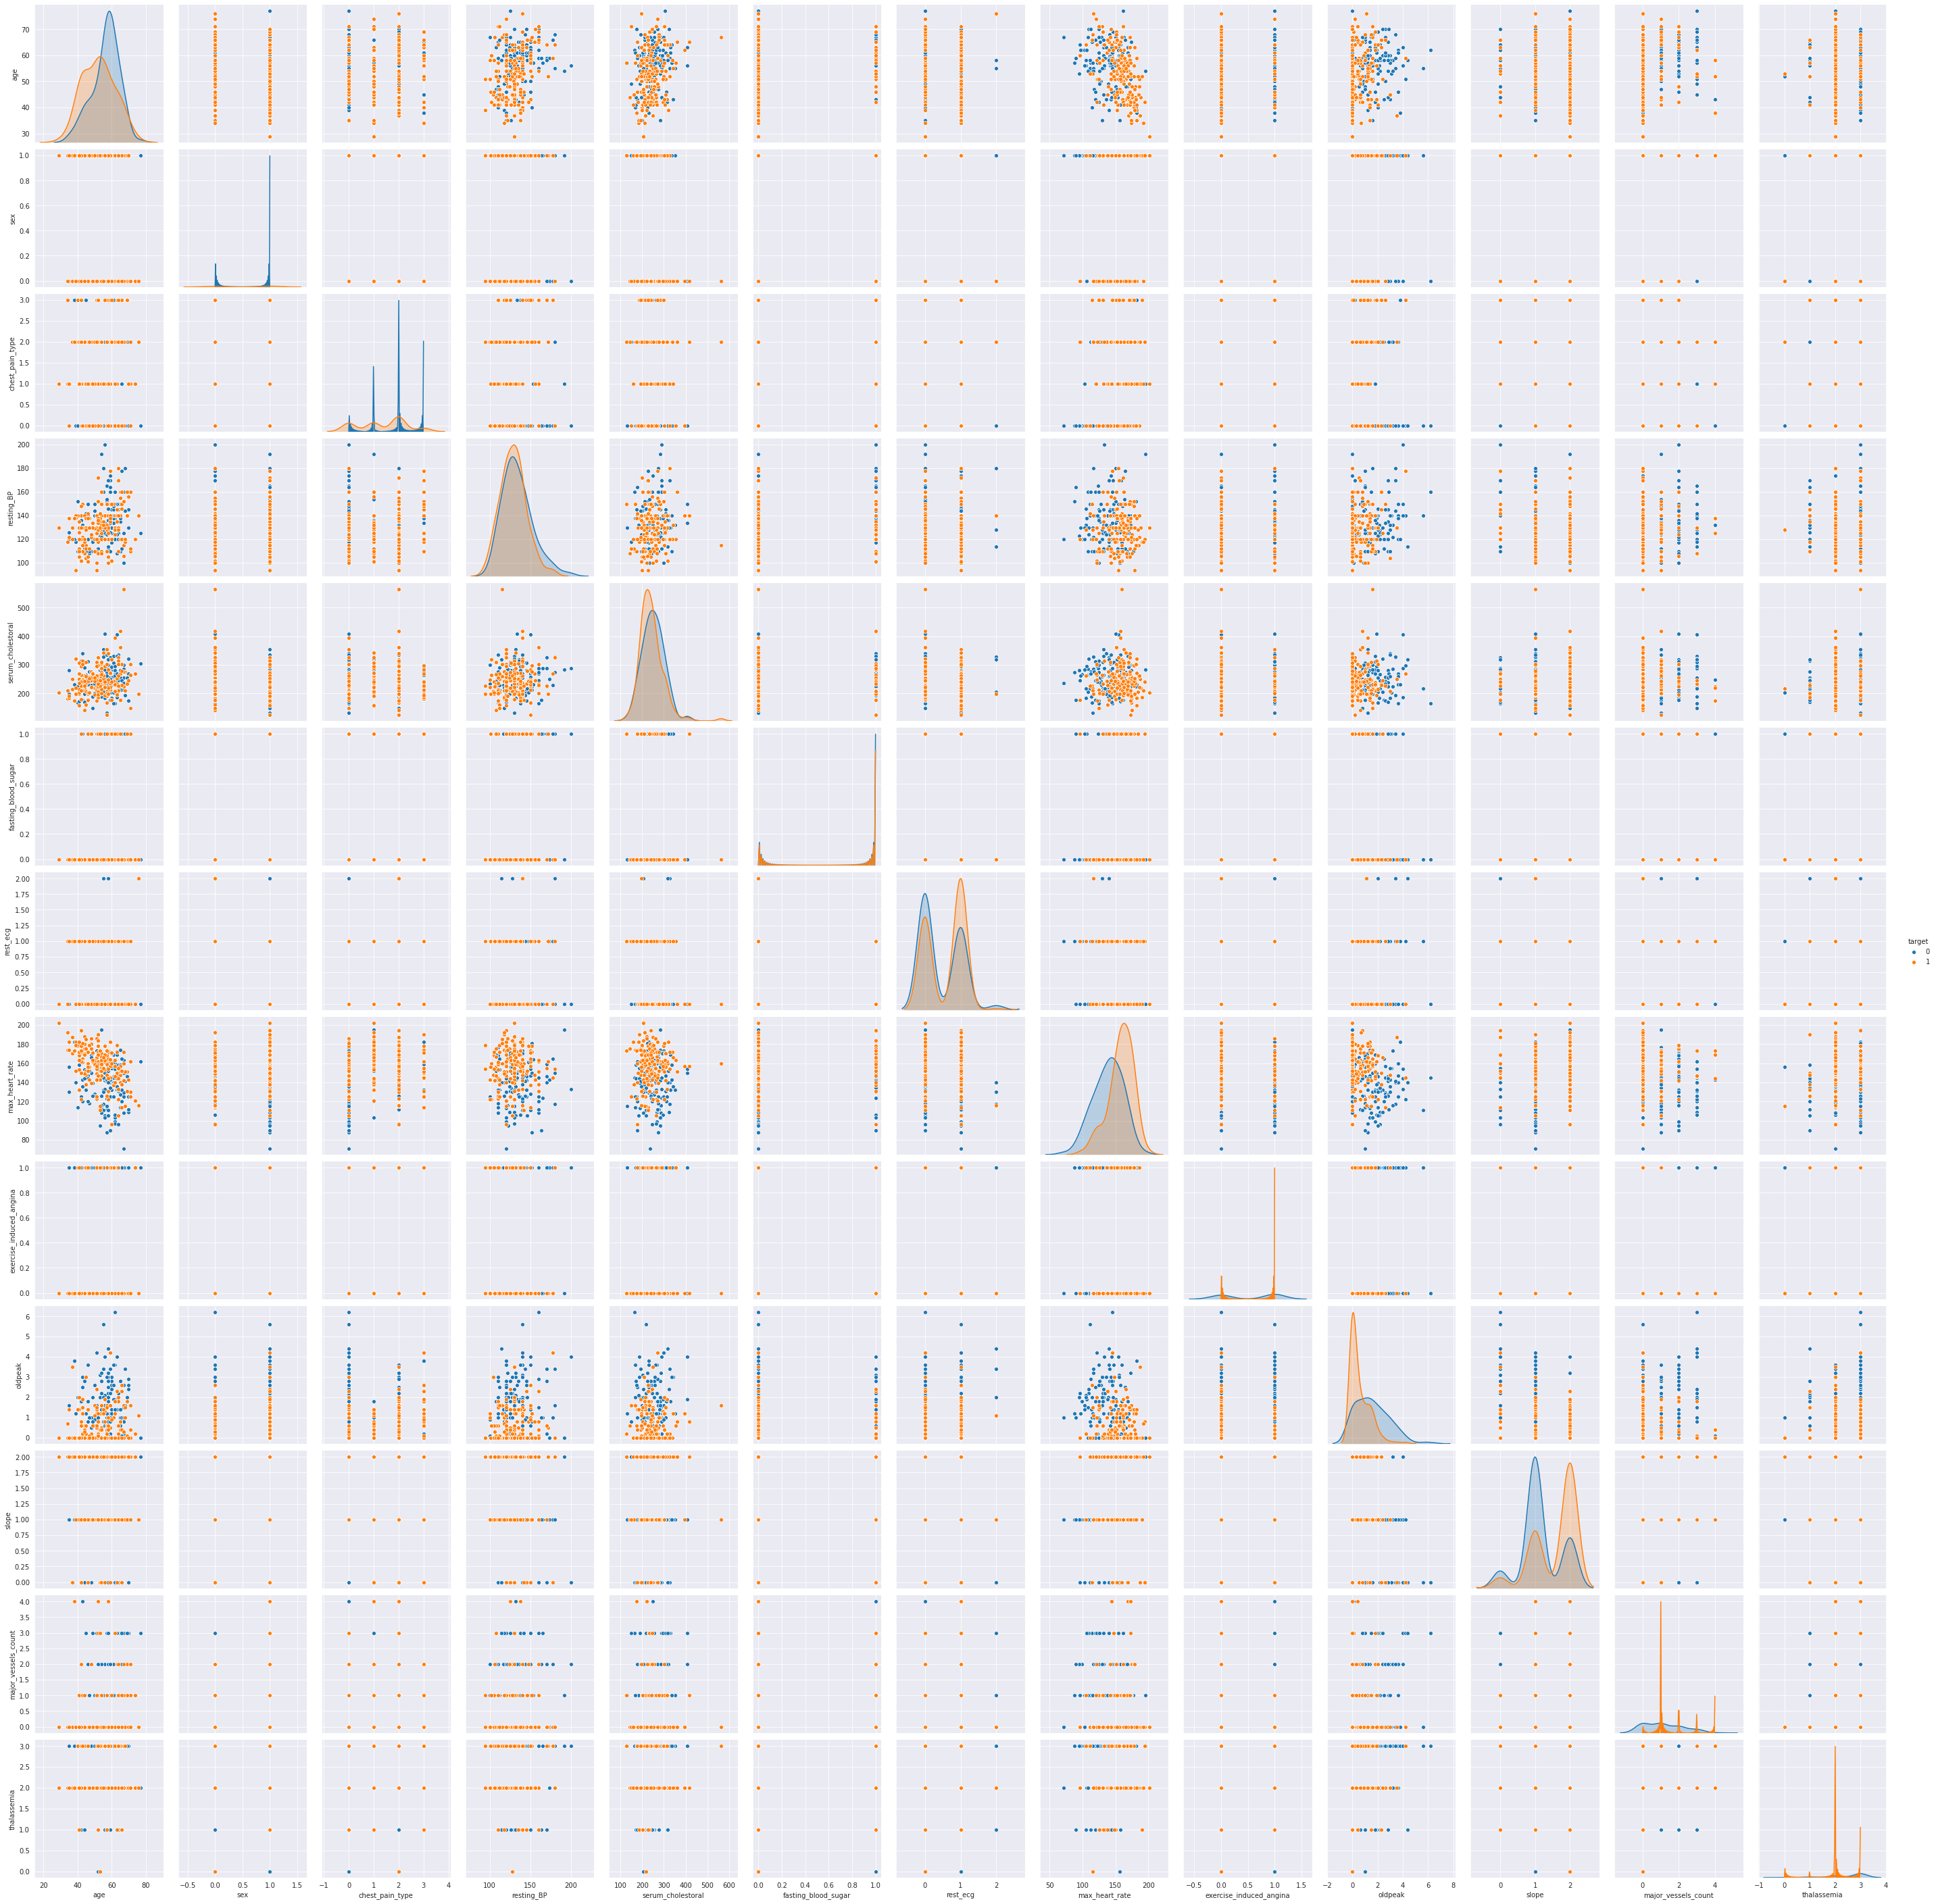

<Figure size 720x720 with 0 Axes>

In [9]:
sns.pairplot(df, height = 3, hue = 'target', diag_kind = 'kde')
plt.figure(figsize=(10,10))
plt.show()

Following can be concluded from pairplot above:

1. Heart Disease is well distributed with age
2. Heart disease is higher among males, however the number of males in the dataset is also high
3. Heart disease is slightly higher among patients with lower serum colesterol
4. Heart disease is higher among patients with higher restin ECG and Heart rate

Now we will introduce categorical variables in the below columns mentioned in the code

In [10]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main_

In [11]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_BP                   int64
serum_cholestoral            int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate               int64
exercise_induced_angina     object
oldpeak                    float64
slope                       object
major_vessels_count          int64
thalassemia                 object
target                       int64
dtype: object

In [12]:
#changing the dtypes to make them categorical values 
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_BP                   int64
serum_cholestoral            int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate               int64
exercise_induced_angina     object
oldpeak                    float64
slope                       object
major_vessels_count          int64
thalassemia                 object
target                       int64
dtype: object

No we will add additional categorical variables we added in the above two cells in the dataframe. This will help segregate the data properly and give better interpretation of models

In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_BP,serum_cholestoral,max_heart_rate,oldpeak,major_vessels_count,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,slope_flat,slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [14]:
#Checking and visualizing the number of people with heart disease
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

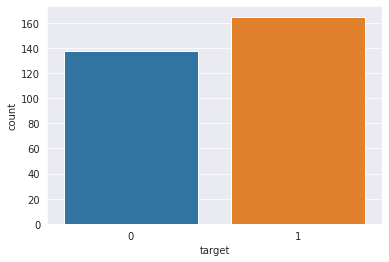

In [15]:
sns.countplot(df['target'])

Now lets check for the correlation matrix to see any ropotionality among features in the given dataset

In [16]:
df_correlation = df.corr()
df_correlation

,age,resting_BP,serum_cholestoral,max_heart_rate,oldpeak,major_vessels_count,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,slope_flat,slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439,-0.098447,-0.059432,0.047516,-0.147399,-0.121308,0.084621,0.141398,0.096801,-0.192580,0.177201,-0.135891,0.063758,0.110752
resting_BP,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931,-0.056769,-0.045107,0.151343,-0.081851,-0.177531,0.058635,0.133249,0.067616,-0.087472,0.025207,-0.140712,0.076369,0.109573
serum_cholestoral,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239,-0.197912,-0.037918,-0.050589,-0.012750,-0.013294,0.034615,0.166565,0.067023,-0.028054,0.051177,-0.004591,-0.093560,0.059621
max_heart_rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741,-0.044020,0.165475,0.079082,0.248317,0.008567,-0.120870,-0.073953,-0.378812,0.448043,-0.419627,0.294801,-0.159748,-0.215417
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696,0.096093,-0.132444,0.086959,-0.277513,-0.005747,0.168172,0.100141,0.288223,-0.511356,0.310986,-0.339086,0.104635,0.302145
major_vessels_count,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724,0.118261,-0.088998,-0.070496,-0.134715,-0.137979,0.030660,0.082679,0.115739,-0.120306,0.141923,-0.221331,0.066618,0.203601
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000,-0.280937,0.316742,0.086957,0.245879,0.028046,-0.068410,-0.159775,-0.436757,0.394066,-0.362053,0.527334,-0.106589,-0.486112
sex_male,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,0.118261,-0.280937,1.000000,-0.116588,0.088043,-0.041249,-0.045032,-0.107689,0.036539,0.141664,-0.014356,-0.009157,-0.376365,0.141135,0.321559
chest_pain_type_atypical angina,-0.059432,-0.045107,-0.037918,0.165475,-0.132444,-0.088998,0.316742,-0.116588,1.000000,-0.181894,-0.282135,-0.083679,-0.009492,-0.090611,-0.271028,0.120276,-0.105320,0.210130,-0.097775,-0.173717
chest_pain_type_non-anginal pain,0.047516,0.151343,-0.050589,0.079082,0.086959,-0.070496,0.086957,0.088043,-0.181894,1.000000,-0.127412,-0.055511,-0.033150,0.070850,-0.093384,-0.044421,0.009321,0.009998,0.033404,-0.022554


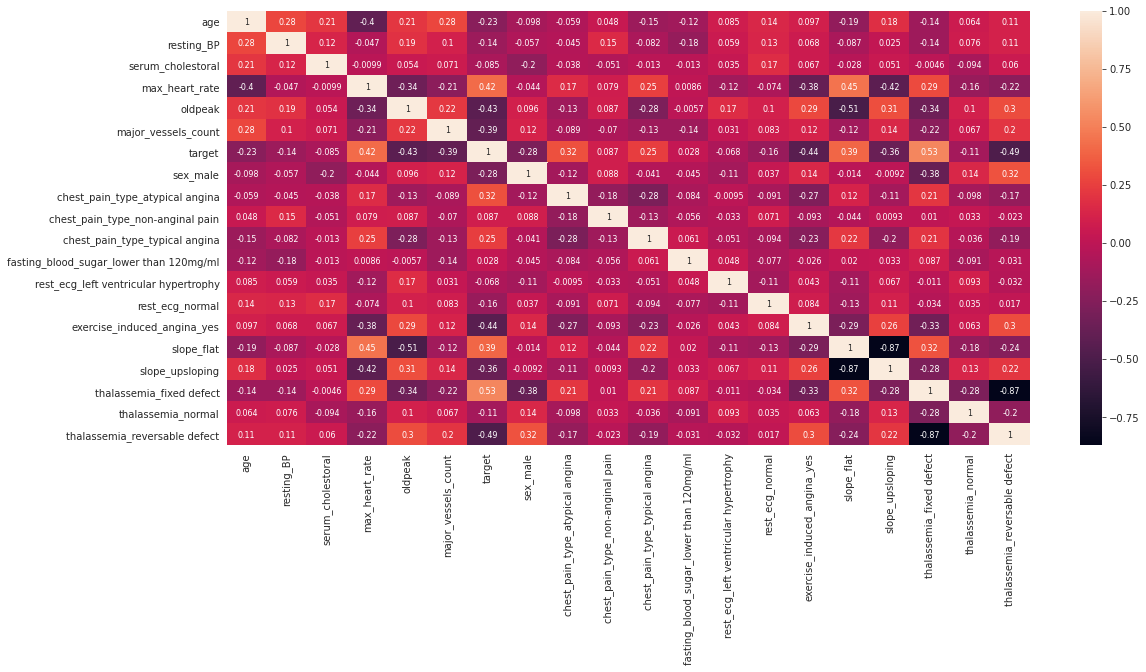

In [17]:
fig, ax = plt.subplots(figsize = (18,8))
sns.heatmap(df_correlation, annot = True, annot_kws= {'size': 8})

The correlation matrix and heatmap shows that target is directly correlated to chest pain type, max heart rate and slope. All the other variables show negative correlation meaning the possibility of heart disease decraeses with increase in those negatively correlated features.




In [16]:
#importing model related packages
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.svm import *

In [17]:
# splitting the dataframe from the target variable
X = df.drop(['target'], axis =1)
y = df['target']

In [18]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [19]:
#checking size of test and train data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 13)
X_test (61, 13)
y_train (242,)
y_test (61,)


In [20]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Training Accuracy : 0.9297520661157025
Testing Accuracy : 0.8360655737704918
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



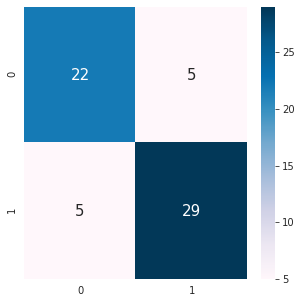

In [21]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)


In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [24]:
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [25]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')



Accuracy is :  0.8263888888888888


Text(0.5, 1.0, 'F1 Score = 0.8648648648648648')

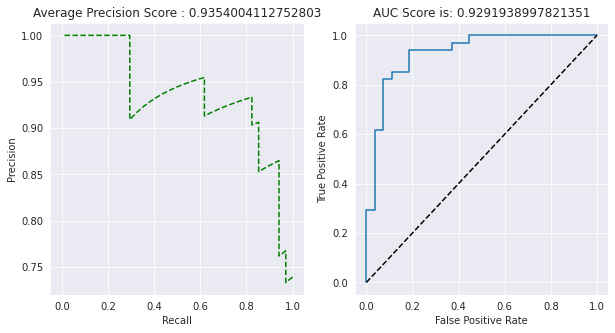

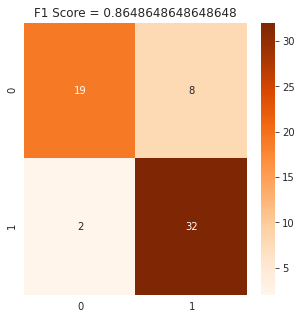

In [26]:
sgd=SGDClassifier(tol=1e-10, random_state=23,loss='log', penalty= "l2", alpha=0.2)
score_sgd=CrossVal(X_train,y_train,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(X_train,y_train)
plotting(y_test,sgd.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,sgd.predict(X_test)), annot= True, cmap='Oranges')
sgd_f1=f1_score(y_test,sgd.predict(X_test))
plt.title('F1 Score = {}'.format(sgd_f1))

Accuracy is :  0.8139917695473251


Text(0.5, 1.0, 'F1 Score = 0.8648648648648648')

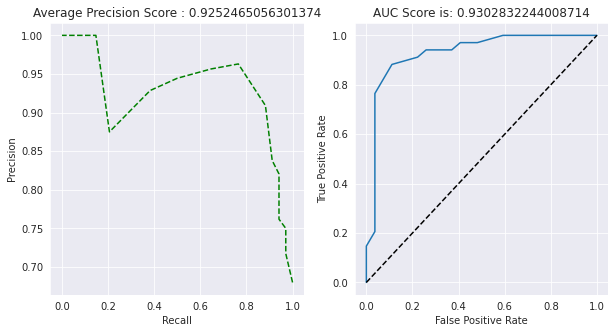

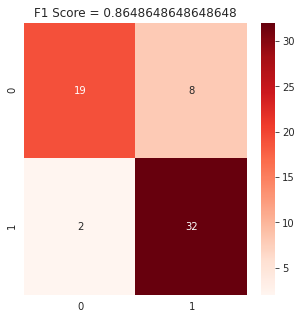

In [28]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
score_k=CrossVal(X_train,y_train,k)
print("Accuracy is : ",score_k)
k.fit(X_train,y_train)
plotting(y_test,k.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,k.predict(X_test)), annot= True, cmap='Reds')
k_f1=f1_score(y_test,k.predict(X_test))
plt.title('F1 Score = {}'.format(k_f1))


Accuracy is :  0.8016975308641975


Text(0.5, 1.0, 'F1 Score = 0.8571428571428571')

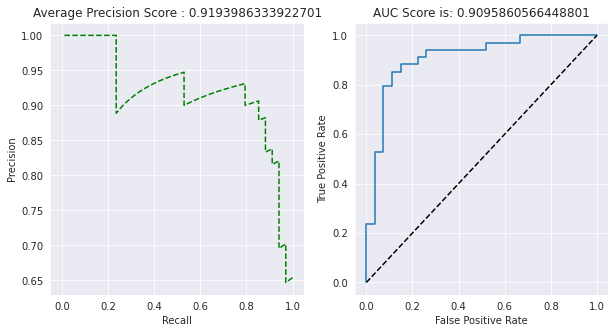

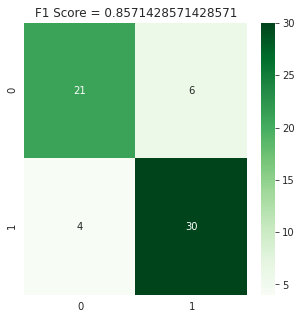

In [29]:
lr=LogisticRegression(class_weight='balanced', tol=1e-10)
score_lr=CrossVal(X_train,y_train,lr)
print("Accuracy is : ",score_lr)
lr.fit(X_train,y_train)
plotting(y_test,lr.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,lr.predict(X_test)), annot= True, cmap='Greens')
lr_f1=f1_score(y_test,lr.predict(X_test))
plt.title('F1 Score = {}'.format(lr_f1))

Accuracy is :  0.7399691358024691


Text(0.5, 1.0, 'F1 Score = 0.8059701492537314')

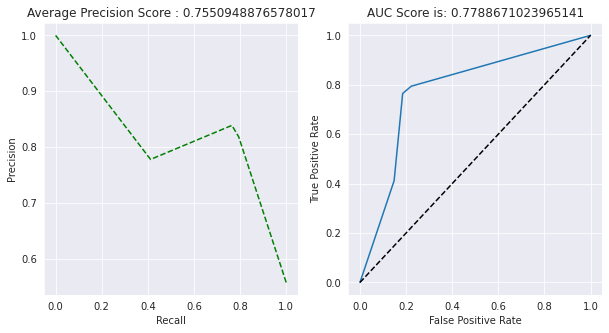

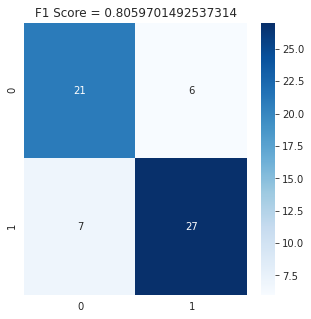

In [30]:
dtc=DecisionTreeClassifier(max_depth=6)
score_dtc=CrossVal(X_train,y_train,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(X_train,y_train)
plotting(y_test,dtc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='Blues')

dtc_f1=f1_score(y_test,dtc.predict(X_test))
plt.title('F1 Score = {}'.format(dtc_f1))

Accuracy is :  0.8140432098765432


Text(0.5, 1.0, 'F1 Score = 0.861111111111111')

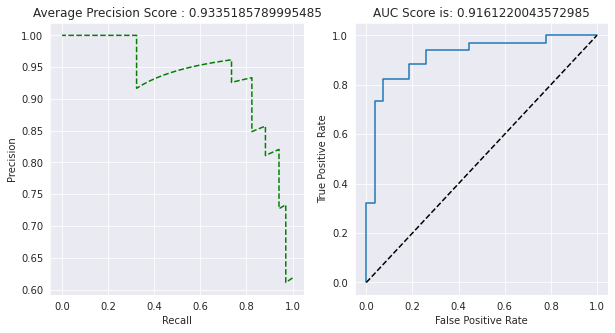

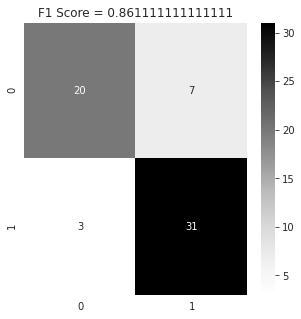

In [31]:
svc=SVC(C=0.2,probability=True,kernel='rbf',gamma=0.1)
score_svc=CrossVal(X_train,y_train,svc)
print("Accuracy is : ",score_svc)
svc.fit(X_train,y_train)
plotting(y_test,svc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,svc.predict(X_test)), annot= True, cmap='Greys')
svc_f1=f1_score(y_test,svc.predict(X_test))
plt.title('F1 Score = {}'.format(svc_f1))

Accuracy is: 0.8182098765432099


Text(0.5, 1.0, 'F1 Score = 0.8529411764705882')

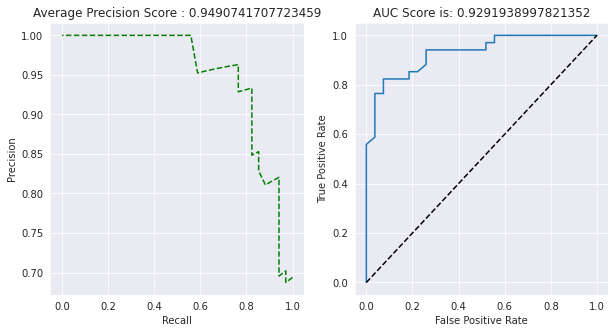

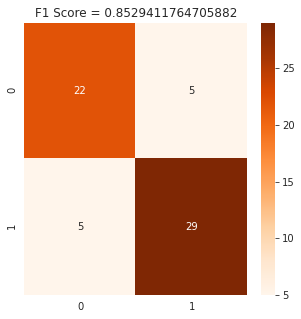

In [32]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=97)
score_rf= CrossVal(X_train,y_train,rf)
print('Accuracy is:',score_rf)
rf.fit(X_train,y_train)
plotting(y_test,rf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot= True, cmap='Oranges')

rf_f1=f1_score(y_test,rf.predict(X_test))
plt.title('F1 Score = {}'.format(rf_f1))

Accuracy is: 0.8140432098765432


Text(0.5, 1.0, 'F1 Score = 0.8421052631578947')

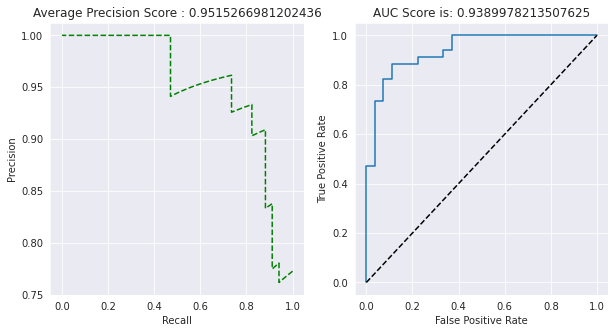

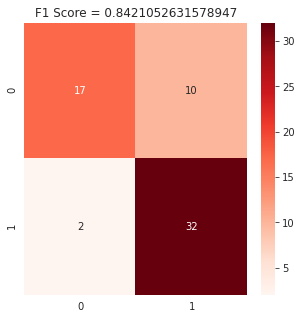

In [33]:
abc=AdaBoostClassifier(sgd,n_estimators=100, random_state=343, learning_rate=0.012)
score_ada= CrossVal(X_train,y_train,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train,y_train)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

Accuracy is: 0.8058127572016461


Text(0.5, 1.0, 'F1 Score = 0.861111111111111')

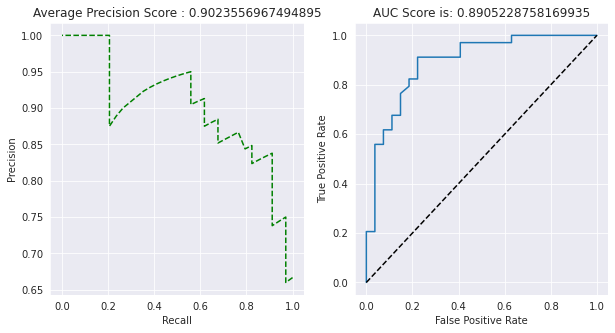

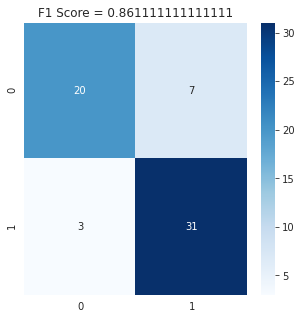

In [34]:
gbc=GradientBoostingClassifier(n_estimators=100, random_state=43, learning_rate = 0.01)
score_gbc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(X_train,y_train)
plotting(y_test,gbc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,gbc.predict(X_test)), annot= True, cmap='Blues')

gbc_f1=f1_score(y_test,gbc.predict(X_test))
plt.title('F1 Score = {}'.format(gbc_f1))

Accuracy is: 0.8058127572016461


Text(0.5, 1.0, 'F1 Score = 0.8285714285714286')

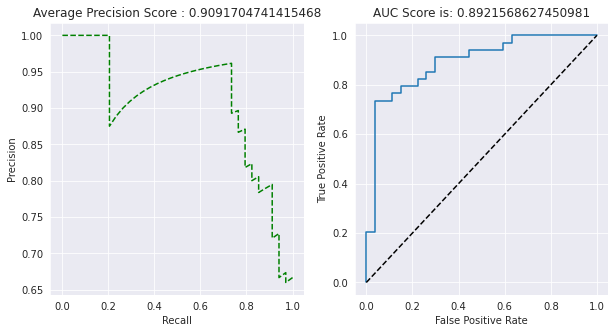

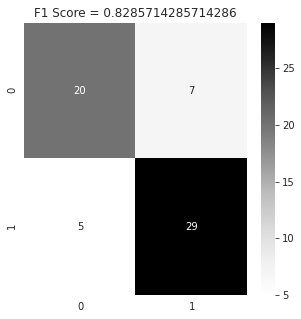

In [35]:
bc=BaggingClassifier(lr,max_samples=23, bootstrap=True, n_jobs= -1)
score_bc= CrossVal(X_train,y_train,gbc)
print('Accuracy is:',score_bc)
bc.fit(X_train,y_train)
plotting(y_test,bc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Greys')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

Text(0.5, 1.0, 'Model Accracy')

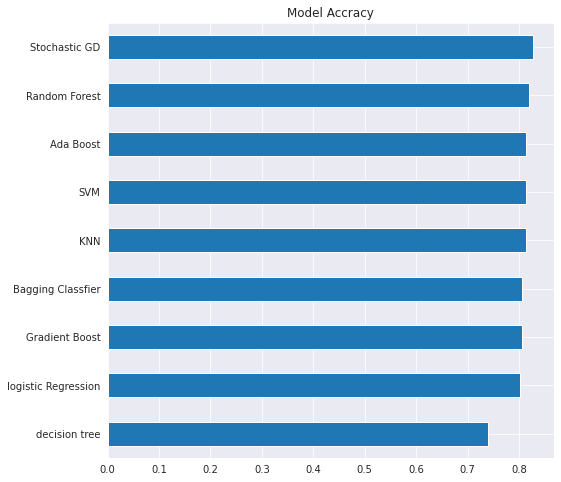

In [40]:
model_accuracy = pd.Series(data=[score_sgd, score_k, score_lr, score_dtc, score_svc, score_rf, 
                           score_ada, score_gbc, score_bc], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'SVM', 'Random Forest',
                             'Ada Boost' , 'Gradient Boost','Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

for Classification task ACCURACY is not important. Instead of accuracy model should be judged on basis of AUC (Area under curve), ROC CURVE, High Precision and High Recall values. F1 score also play imporant role which is equals to 2/(1/precision + 1/Recall) score

Text(0.5, 1.0, 'Model F1 Score Comparison')

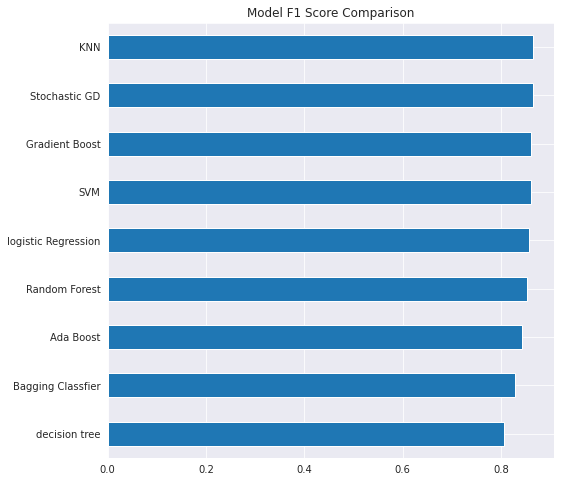

In [41]:
model_f1_score = pd.Series(data=[sgd_f1, k_f1, lr_f1, dtc_f1, svc_f1, rf_f1, 
                           abc_f1, gbc_f1, bc_f1], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'SVM', 'Random Forest',
                                 'Ada Boost' , 'Gradient Boost', 'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.barh()
plt.title('Model F1 Score Comparison')

Accuracy is: 0.8305555555555554


Text(0.5, 1.0, 'F1 Score = 0.8767123287671232')

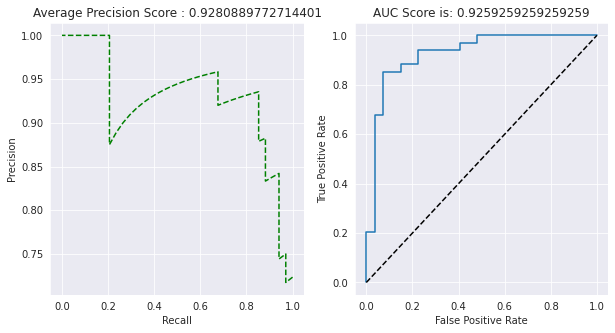

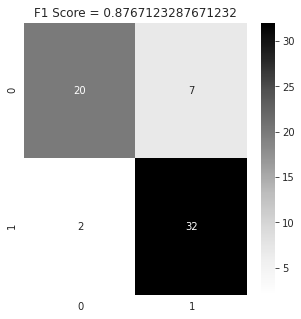

In [42]:
vc=VotingClassifier(estimators=[('knn',k),('SGD',sgd),('lr',lr)],
                    voting='soft')
score_vc= CrossVal(X_train,y_train,vc)
print('Accuracy is:',score_vc)
vc.fit(X_train,y_train)
plotting(y_test,vc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,vc.predict(X_test)), annot= True, cmap='Greys')

vc_f1=f1_score(y_test,vc.predict(X_test))
plt.title('F1 Score = {}'.format(vc_f1))

In [43]:
from sklearn.model_selection import StratifiedKFold
k=StratifiedKFold(n_splits= 5, shuffle=False, random_state=6)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
